# Online Coupon Sales Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load Data

In [2]:
df = pd.read_csv("Coupons.csv")

## Inspect the Data

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  150 non-null    object
 1   Age     150 non-null    int64 
 2   Item1   150 non-null    object
 3   Item2   150 non-null    object
 4   Item3   150 non-null    object
 5   Coupon  150 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB
None
              Age
count  150.000000
mean    36.380000
std      8.155922
min     24.000000
25%     29.000000
50%     36.000000
75%     43.000000
max     50.000000


## Check Nulls

In [4]:
nulls = df.isnull().sum()
print("\nNull Values per Column:\n", nulls)


Null Values per Column:
 Gender    0
Age       0
Item1     0
Item2     0
Item3     0
Coupon    0
dtype: int64


## Drop rows with too many NaNs (threshold = 2)

In [5]:
df = df[df.isnull().sum(axis=1) <= 2]

## Customer engagement by product

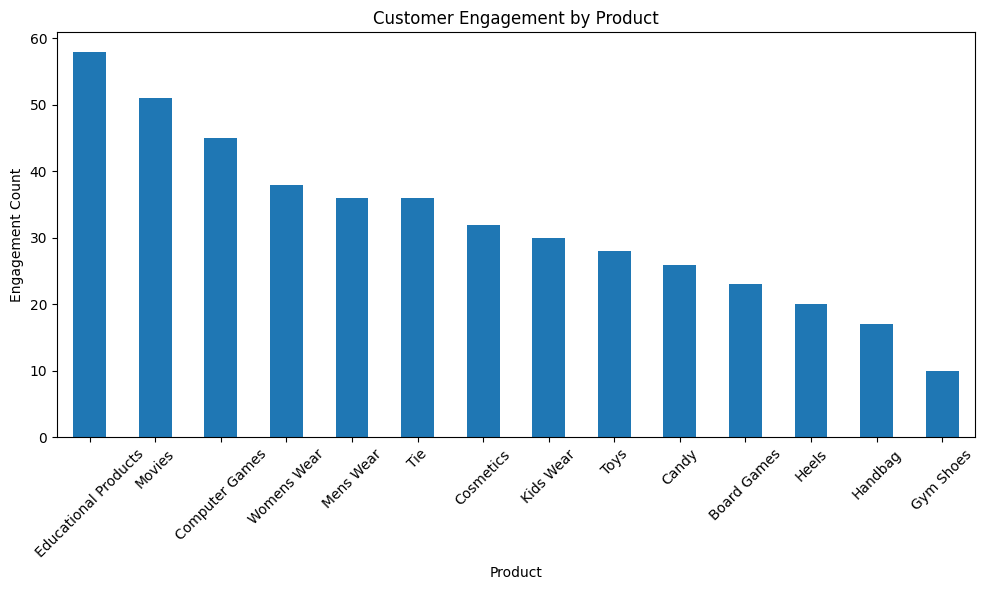

In [6]:
all_items = pd.concat([df['Item1'], df['Item2'], df['Item3']])
product_engagement = all_items.value_counts()
product_engagement.plot(kind='bar', figsize=(10,6), title='Customer Engagement by Product')
plt.xlabel("Product")
plt.ylabel("Engagement Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Product-wise coupon sales

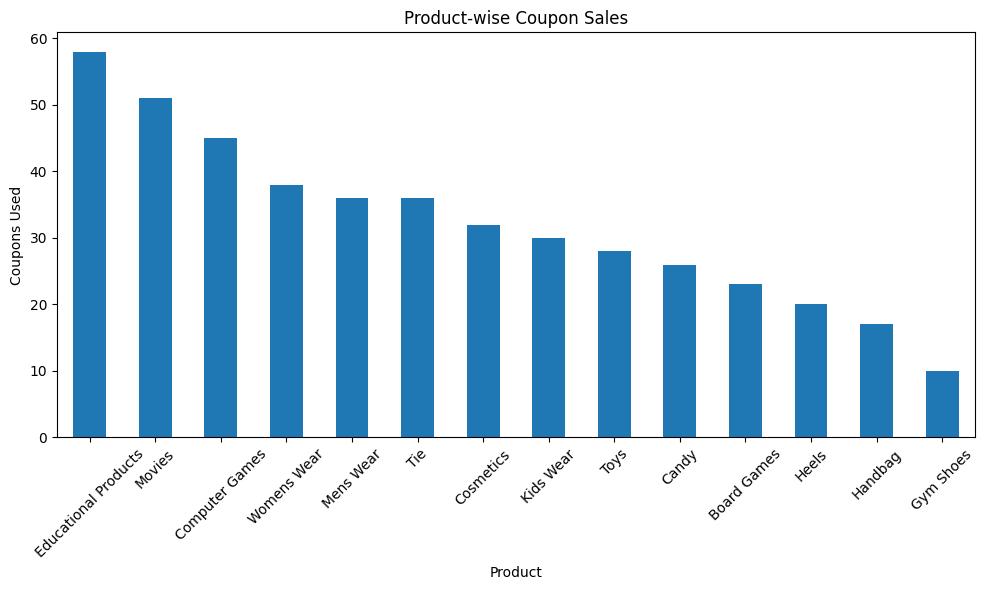

In [7]:
product_sales = all_items.value_counts()
product_sales.plot(kind='bar', figsize=(10,6), title='Product-wise Coupon Sales')
plt.xlabel("Product")
plt.ylabel("Coupons Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Classification of coupons based on products

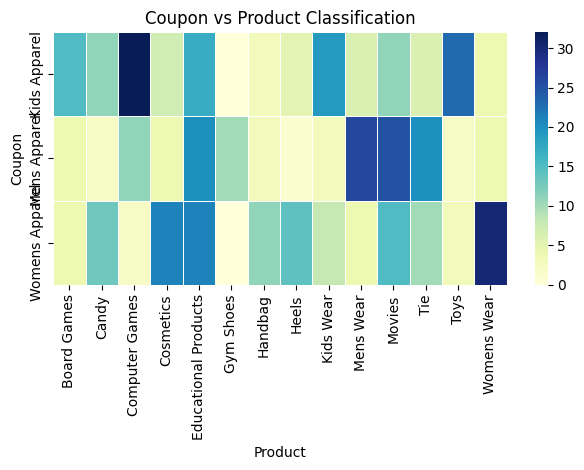

In [8]:
coupon_product_df = pd.melt(df, id_vars=['Coupon'], value_vars=['Item1', 'Item2', 'Item3'],
                            var_name='ItemPos', value_name='Product')
coupon_product_matrix = pd.crosstab(coupon_product_df['Coupon'], coupon_product_df['Product'])
sns.heatmap(coupon_product_matrix, cmap="YlGnBu", linewidths=0.5)
plt.title("Coupon vs Product Classification")
plt.xlabel("Product")
plt.ylabel("Coupon")
plt.tight_layout()
plt.show()

## Feature Engineering

In [9]:
# Assume: Add 'Num_Items' column as total products per row
df['Num_Items'] = df[['Item1', 'Item2', 'Item3']].notnull().sum(axis=1)

## Prepare data for regression

In [10]:
# Convert categorical columns to dummy variables
df_encoded = pd.get_dummies(df[['Gender', 'Item1', 'Item2', 'Item3']].astype(str), drop_first=True)

In [11]:
# Merge with numerical columns
df_final = pd.concat([df[['Age', 'Coupon', 'Num_Items']], df_encoded], axis=1).dropna()

In [15]:
# Encode target
df_final['Coupon_encoded'] = df_final['Coupon'].astype('category').cat.codes

## Train/Test Split

In [17]:
X = df_final.drop(["Coupon", "Coupon_encoded"], axis=1)
y = df_final["Coupon_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [19]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.4879236652655481
MSE: 0.36641906618776326
MAE: 0.4660915154016521


## Residual Analysis

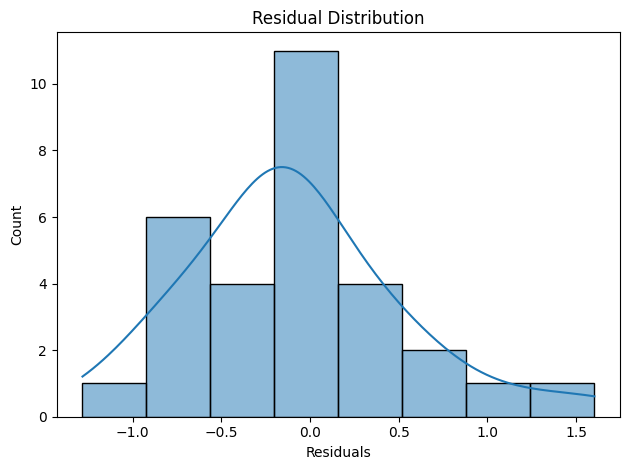

In [20]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

## Error % Graph

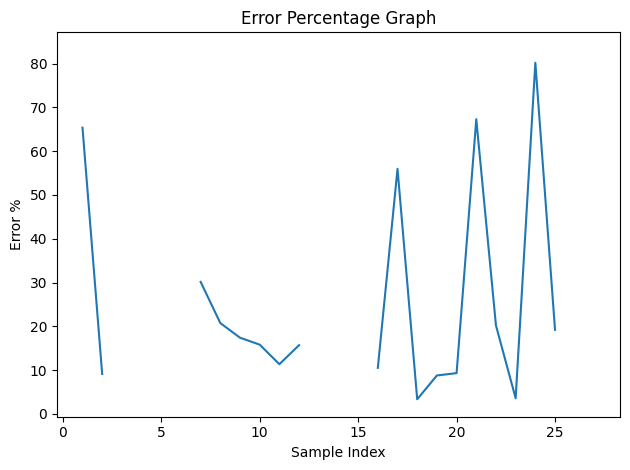

In [21]:
error_percent = (abs(residuals) / y_test) * 100
plt.plot(error_percent.values)
plt.title("Error Percentage Graph")
plt.xlabel("Sample Index")
plt.ylabel("Error %")
plt.tight_layout()
plt.show()